# Importing libraries and data 

In [2]:
# Install geopy & folium library
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium --yes 

# Importing libraries
from bs4 import BeautifulSoup
import requests   # library to handle requests
import lxml       # parse the website in lxml format
import numpy as np # library to handle data in a vectorized manner 
import pandas as pd # library for data analsysis
import re # library used for regular expressions
import os
import folium
from folium.features import Choropleth
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

%matplotlib inline

print("Libraries are loaded")

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries are loaded


In [2]:
# Load in data files
ams_boroughs = pd.read_csv('GEBIED_STADSDELEN.csv', sep=';')
ams_neighborhoods = pd.read_csv('GEBIED_BUURTEN.csv', sep=';')
ams_postalcodes = pd.read_csv('PC6.csv', sep=';')

In [3]:
print(ams_boroughs.shape)
ams_boroughs.head()

(8, 9)


OBJECTNUMMER Stadsdeel_code   Stadsdeel    Opp_m2  \
0             1              A     Centrum   8043500   
1             2              B   Westpoort  28991600   
2             3              E        West  10629900   
3             4              F  Nieuw-West  38015500   
4             5              K        Zuid  17274000   

                                         WKT_LNG_LAT  \
0  POLYGON((4.932973 52.3704,4.932942 52.370539,4...   
1  POLYGON((4.885861 52.39937,4.882702 52.401695,...   
2  POLYGON((4.895084 52.388684,4.894675 52.389933...   
3  POLYGON((4.850498 52.364232,4.850459 52.365189...   
4  POLYGON((4.914989 52.342139,4.914945 52.342421...   

                                         WKT_LAT_LNG       LNG        LAT  \
0  POLYGON((52.3704 4.932973,52.370539 4.932942,5...  4.903712  52.373297   
1  POLYGON((52.39937 4.885861,52.401695 4.882702,...  4.807319  52.411465   
2  POLYGON((52.388684 4.895084,52.389933 4.894675...  4.865216  52.377879   
3  POLYGON((52.364232 4.850498,52.365189 4.850459...  4.802676  52.363591   
4  POLYGON((52.342139 4.914989,52.342421 4.914945...  4.866063  52.341721   

   Unnamed: 8  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [4]:
print(ams_neighborhoods.shape)
ams_neighborhoods.head()

(481, 11)


OBJECTNUMMER Buurt_code                          Buurt  \
0             1       F81d            Calandlaan/Lelylaan   
1             2       F81e                Osdorp Zuidoost   
2             3       F82a            Osdorp Midden Noord   
3             4       F82b             Osdorp Midden Zuid   
4             5       F82c  Zuidwestkwadrant Osdorp Noord   

  Buurtcombinatie_code Stadsdeel_code    Opp_m2  \
0                  F81              F  275360.0   
1                  F81              F  519366.0   
2                  F82              F  215541.0   
3                  F82              F  258379.0   
4                  F82              F  240774.0   

                                         WKT_LNG_LAT  \
0  POLYGON((4.800801 52.355175,4.809055 52.356842...   
1  POLYGON((4.818583 52.357519,4.818622 52.356295...   
2  POLYGON((4.786657 52.362712,4.795326 52.364434...   
3  POLYGON((4.788293 52.359736,4.796917 52.36148,...   
4  POLYGON((4.790209 52.356207,4.799258 52.358027...   

                                         WKT_LAT_LNG       LNG        LAT  \
0  POLYGON((52.355175 4.800801,52.356842 4.809055...  4.809697  52.355708   
1  POLYGON((52.357519 4.818583,52.356295 4.818622...  4.811344  52.353736   
2  POLYGON((52.362712 4.786657,52.364434 4.795326...  4.791792  52.362078   
3  POLYGON((52.359736 4.788293,52.36148 4.796917,...  4.793781  52.358838   
4  POLYGON((52.356207 4.790209,52.358027 4.799258...  4.795597  52.355523   

   Unnamed: 10  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [5]:
print(ams_postalcodes.shape)
ams_postalcodes.head()

(18280, 8)


OBJECTNUMMER Postcode6 Buurtcode  \
0             1    1047HD      B10g   
1             2    1047HB      B10g   
2             3    1047HG      B10g   
3             4    1047HK      B10g   
4             5    1047HH      B10g   

                                         WKT_LNG_LAT  \
0  MULTIPOLYGON(((4.735727 52.407357,4.735698 52....   
1  MULTIPOLYGON(((4.739624 52.419242,4.739596 52....   
2  MULTIPOLYGON(((4.741631 52.405609,4.741602 52....   
3  MULTIPOLYGON(((4.746484 52.39985,4.746461 52.3...   
4  MULTIPOLYGON(((4.749176 52.410365,4.749014 52....   

                                         WKT_LAT_LNG       LNG        LAT  \
0  MULTIPOLYGON(((52.407357 4.735727,52.407409 4....  4.737866  52.406724   
1  MULTIPOLYGON(((52.419242 4.739624,52.419294 4....  4.739692  52.417695   
2  MULTIPOLYGON(((52.405609 4.741631,52.405662 4....  4.742172  52.405478   
3  MULTIPOLYGON(((52.39985 4.746484,52.399883 4.7...  4.746901  52.400519   
4  MULTIPOLYGON(((52.410365 4.749176,52.410378 4....  4.749334  52.410536   

   Unnamed: 7  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

# Data Cleaning & Wrangling
- Three datasources have been extracted from the open data source of the City of Amsterdam:
    * Boroughs
    * Neighborhoods
    * Postalcodes
- For now we will focus on the Boroughs and postalcodes first. We want a dataframe that includes postalcodes per borough. This will help to map venues to a borough later on. 
    1. Retrieve zipcodes with first four letters
    2. Transform 'Buurtcode' to 'Stadsdeelcode'
    3. Merge cleaned data to a new datafrae with Postcode6, Postcode4, Stadsdeel_code, Stadsdeel

In [6]:
# Function defined to strip letters and retrieve postalcode with only 4 numbers
def post4(PostalCode6):
    return re.sub("[^0-9]", "", PostalCode6)

# Function defined to strip numbers and lower case letters
def buurt_to_stadsdeel(Buurtcode):
    return re.sub("[^A-Z]", "", Buurtcode)

# Drop empty column
ams_postalcodes.drop('Unnamed: 7', axis=1, inplace=True)

# Apply function and create new column
ams_postalcodes['Postcode4'] = ams_postalcodes['Postcode6'].apply(post4)

# Apply function and create new column
ams_postalcodes['Stadsdeel_code'] = ams_postalcodes['Buurtcode'].apply(buurt_to_stadsdeel)

# Print result
ams_postalcodes.head()

OBJECTNUMMER Postcode6 Buurtcode  \
0             1    1047HD      B10g   
1             2    1047HB      B10g   
2             3    1047HG      B10g   
3             4    1047HK      B10g   
4             5    1047HH      B10g   

                                         WKT_LNG_LAT  \
0  MULTIPOLYGON(((4.735727 52.407357,4.735698 52....   
1  MULTIPOLYGON(((4.739624 52.419242,4.739596 52....   
2  MULTIPOLYGON(((4.741631 52.405609,4.741602 52....   
3  MULTIPOLYGON(((4.746484 52.39985,4.746461 52.3...   
4  MULTIPOLYGON(((4.749176 52.410365,4.749014 52....   

                                         WKT_LAT_LNG       LNG        LAT  \
0  MULTIPOLYGON(((52.407357 4.735727,52.407409 4....  4.737866  52.406724   
1  MULTIPOLYGON(((52.419242 4.739624,52.419294 4....  4.739692  52.417695   
2  MULTIPOLYGON(((52.405609 4.741631,52.405662 4....  4.742172  52.405478   
3  MULTIPOLYGON(((52.39985 4.746484,52.399883 4.7...  4.746901  52.400519   
4  MULTIPOLYGON(((52.410365 4.749176,52.410378 4....  4.749334  52.410536   

  Postcode4 Stadsdeel_code  
0      1047              B  
1      1047              B  
2      1047              B  
3      1047              B  
4      1047              B

In [7]:
ams = ams_postalcodes[['Postcode6', 'Postcode4', 'Buurtcode', 'Stadsdeel_code']].merge(ams_boroughs[['Stadsdeel_code', 'Stadsdeel']], on='Stadsdeel_code')
ams

Postcode6 Postcode4 Buurtcode Stadsdeel_code  Stadsdeel
0        1047HD      1047      B10g              B  Westpoort
1        1047HB      1047      B10g              B  Westpoort
2        1047HG      1047      B10g              B  Westpoort
3        1047HK      1047      B10g              B  Westpoort
4        1047HH      1047      B10g              B  Westpoort
...         ...       ...       ...            ...        ...
18275    1109AT      1109      T98a              T   Zuidoost
18276    1109AN      1109      T98a              T   Zuidoost
18277    1109CJ      1109      T98a              T   Zuidoost
18278    1109AP      1109      T98a              T   Zuidoost
18279    1104SX      1104      T94n              T   Zuidoost

[18280 rows x 5 columns]

# Retrieve data from Foursquare API

In [8]:
# Credentials for Foursquare -> STILL HAVE TO LOOK HOW TO MAKE THEM SECRET
CLIENT_ID = 'XXXXXX'
CLIENT_SECRET = 'XXXXXXX'
VERSION = '20200510'

In [9]:
address = 'De Pijp, Amsterdam'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

52.3542396 4.896946171061886


In [10]:
def getNearbyVenues(names, latitudes, longitudes):
    from time import sleep
    sleep(0.05)
    radius=500
    LIMIT=1000
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['location'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'Venue_ID',
                  'Venue Latitude', 
                  'Venue Longitude',
                  'PostalCode',
                  'Venue Category']
    
    return nearby_venues

In [11]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [12]:
# Prep data for venue retrieval through foursquare API
df = ams_boroughs[['Stadsdeel', 'LAT', 'LNG']]
df2 = ams_neighborhoods[['Buurt', 'LAT', 'LNG']]

# Set column names 
column_names = ['Neighborhood','Latitude','Longitude']

# Adjust column names for dataframe
df.columns = column_names
df2.columns = column_names

# Print cleaned dataframe
df2

Neighborhood   Latitude  Longitude
0              Calandlaan/Lelylaan  52.355708   4.809697
1                  Osdorp Zuidoost  52.353736   4.811344
2              Osdorp Midden Noord  52.362078   4.791792
3               Osdorp Midden Zuid  52.358838   4.793781
4    Zuidwestkwadrant Osdorp Noord  52.355523   4.795597
..                             ...        ...        ...
476                  Dorp Driemond  52.305792   5.015748
477      Landelijk gebied Driemond  52.315993   5.008838
478             Bijlmermuseum Zuid  52.318360   4.976516
479               Gaasperdam Noord  52.298600   4.977504
480                Gaasperdam Zuid  52.294507   4.978339

[481 rows x 3 columns]

In [13]:
amsterdam_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'])

Centrum
Westpoort
West
Nieuw-West
Zuid
Oost
Noord
Zuidoost


In [14]:
amsterdam_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Centrum              52.373297                4.903712   
1        Centrum              52.373297                4.903712   
2        Centrum              52.373297                4.903712   
3        Centrum              52.373297                4.903712   
4        Centrum              52.373297                4.903712   
..           ...                    ...                     ...   
112        Noord              52.399439                4.967446   
113     Zuidoost              52.304654                4.975444   
114     Zuidoost              52.304654                4.975444   
115     Zuidoost              52.304654                4.975444   
116     Zuidoost              52.304654                4.975444   

                          Venue                  Venue_ID  Venue Latitude  \
0                    Black Gold  5561f187498e6647f091c1f8       52.371787   
1                          OCHA  4b06f081f964a52098f322e3       52.374024   
2                 Toko Dun Yong  4a70af0bf964a52032d81fe3       52.374323   
3            Eetcafé Van Beeren  4b2d1a84f964a5205dce24e3       52.372044   
4                         Latei  4a27db29f964a52059921fe3       52.373292   
..                          ...                       ...             ...   
112     Tuinpark Buikslotermeer  4bb7233ff562ef3b280d3197       52.395914   
113    Centraal park Gaasperdam  4a270720f964a520078d1fe3       52.303604   
114     Speeltuintje Leerdamhof  4e7e016e6da1f0cd6e645317       52.306326   
115  Zeilvereniging Gaasperplas  4c36149518e72d7f113614f5       52.306264   
116     Brinkie kinderboerderij  4c23a83ef1272d7f55c881c5       52.303004   

     Venue Longitude                                         PostalCode  \
0           4.903056  {'address': 'Korte Koningstraat 13', 'crossStr...   
1           4.901683  {'address': 'Binnen Bantammerstraat 1', 'cross...   
2           4.900986  {'address': 'Stormsteeg 9', 'lat': 52.37432320...   
3           4.902295  {'address': 'Koningsstraat 54', 'lat': 52.3720...   
4           4.900279  {'address': 'Zeedijk 143', 'lat': 52.373292420...   
..               ...                                                ...   
112         4.965015  {'address': 'Volendammerweg 305', 'lat': 52.39...   
113         4.973320  {'address': 'Langbroekdreef', 'lat': 52.303604...   
114         4.977493  {'lat': 52.306326138885, 'lng': 4.977493106664...   
115         4.977788  {'lat': 52.30626362086776, 'lng': 4.9777875438...   
116         4.972593  {'lat': 52.30300448070908, 'lng': 4.9725929431...   

      Venue Category  
0        Coffee Shop  
1    Thai Restaurant  
2      Grocery Store  
3          Gastropub  
4               Café  
..               ...  
112           Garden  
113             Park  
114       Playground  
115  Harbor / Marina  
116             Farm  

[117 rows x 9 columns]

In [15]:
# Function to extract postcal codes 
def extractPC(PostalCode):
        try:
            return PostalCode['postalCode']
        except:
            return np.nan

# Clean postcodes to PC4
def post4_clean(PC4):
    try:
        return re.sub("[^0-9]", "", PC4)
    except:
        return np.nan
        
# Apply function and create new column
amsterdam_venues['PC4'] = amsterdam_venues['PostalCode'].apply(extractPC)

# Apply function and create new column
amsterdam_venues['PC4-Clean'] = amsterdam_venues['PC4'].apply(post4_clean)

# Print result
print(amsterdam_venues.shape)
amsterdam_venues

(117, 11)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Centrum              52.373297                4.903712   
1        Centrum              52.373297                4.903712   
2        Centrum              52.373297                4.903712   
3        Centrum              52.373297                4.903712   
4        Centrum              52.373297                4.903712   
..           ...                    ...                     ...   
112        Noord              52.399439                4.967446   
113     Zuidoost              52.304654                4.975444   
114     Zuidoost              52.304654                4.975444   
115     Zuidoost              52.304654                4.975444   
116     Zuidoost              52.304654                4.975444   

                          Venue                  Venue_ID  Venue Latitude  \
0                    Black Gold  5561f187498e6647f091c1f8       52.371787   
1                          OCHA  4b06f081f964a52098f322e3       52.374024   
2                 Toko Dun Yong  4a70af0bf964a52032d81fe3       52.374323   
3            Eetcafé Van Beeren  4b2d1a84f964a5205dce24e3       52.372044   
4                         Latei  4a27db29f964a52059921fe3       52.373292   
..                          ...                       ...             ...   
112     Tuinpark Buikslotermeer  4bb7233ff562ef3b280d3197       52.395914   
113    Centraal park Gaasperdam  4a270720f964a520078d1fe3       52.303604   
114     Speeltuintje Leerdamhof  4e7e016e6da1f0cd6e645317       52.306326   
115  Zeilvereniging Gaasperplas  4c36149518e72d7f113614f5       52.306264   
116     Brinkie kinderboerderij  4c23a83ef1272d7f55c881c5       52.303004   

     Venue Longitude                                         PostalCode  \
0           4.903056  {'address': 'Korte Koningstraat 13', 'crossStr...   
1           4.901683  {'address': 'Binnen Bantammerstraat 1', 'cross...   
2           4.900986  {'address': 'Stormsteeg 9', 'lat': 52.37432320...   
3           4.902295  {'address': 'Koningsstraat 54', 'lat': 52.3720...   
4           4.900279  {'address': 'Zeedijk 143', 'lat': 52.373292420...   
..               ...                                                ...   
112         4.965015  {'address': 'Volendammerweg 305', 'lat': 52.39...   
113         4.973320  {'address': 'Langbroekdreef', 'lat': 52.303604...   
114         4.977493  {'lat': 52.306326138885, 'lng': 4.977493106664...   
115         4.977788  {'lat': 52.30626362086776, 'lng': 4.9777875438...   
116         4.972593  {'lat': 52.30300448070908, 'lng': 4.9725929431...   

      Venue Category        PC4 PC4-Clean  
0        Coffee Shop    1011 EX      1011  
1    Thai Restaurant     1011CH      1011  
2      Grocery Store    1012 BD      1012  
3          Gastropub        NaN       NaN  
4               Café    1012 AW      1012  
..               ...        ...       ...  
112           Garden       1027      1027  
113             Park  Amsterdam            
114       Playground        NaN       NaN  
115  Harbor / Marina       1108      1108  
116             Farm        NaN       NaN  

[117 rows x 11 columns]

In [16]:
amsterdam_venues.Neighborhood.value_counts()

Centrum       50
West          28
Nieuw-West    16
Zuid           8
Oost           6
Westpoort      4
Zuidoost       4
Noord          1
Name: Neighborhood, dtype: int64

In [17]:
amsterdam_venues.groupby(['Neighborhood', 'Venue Category']).agg({'Venue':'count'}).sort_values(by='Venue')

Venue
Neighborhood Venue Category             
Centrum      Athletics & Sports        1
West         Gym / Fitness Center      1
             Gym                       1
             Greek Restaurant          1
             Distribution Center       1
...                                  ...
Nieuw-West   Supermarket               2
Centrum      Coffee Shop               3
Nieuw-West   Bakery                    3
Centrum      Hostel                    3
             Bar                       3

[93 rows x 1 columns]

In [18]:
amsterdam_venues_neighborhood = getNearbyVenues(names=df2['Neighborhood'],
                                                latitudes=df2['Latitude'],
                                                longitudes=df2['Longitude'])

Calandlaan/Lelylaan
Osdorp Zuidoost
Osdorp Midden Noord
Osdorp Midden Zuid
Zuidwestkwadrant Osdorp Noord
Zuidwestkwadrant Osdorp Zuid
De Punt
Bedrijvencentrum Osdorp
Overtoomse Veld Noord
Rembrandtpark Noord
Rembrandtpark Zuid
Johan Jongkindbuurt
Lucas/Andreasziekenhuis e.o.
Koningin Wilhelminaplein
Andreasterrein
Delflandpleinbuurt Oost
Delflandpleinbuurt West
Riekerhaven
Schipluidenbuurt
Riekerpolder
Park Haagseweg
Nieuw Sloten Noordwest
Nieuw Sloten Noordoost
Belgiëplein e.o.
Nieuw Sloten Zuidwest
Nieuw Sloten Zuidoost
Hemonybuurt
Gerard Doubuurt
Frans Halsbuurt
Hercules Seghersbuurt
Sarphatiparkbuurt
Willibrordusbuurt
Van der Helstpleinbuurt
Lizzy Ansinghbuurt
Cornelis Troostbuurt
Surinamepleinbuurt
Kop Zeedijk
BG-terrein e.o.
Stationsplein e.o.
Hemelrijk
Spuistraat Noord
Nieuwe Kerk e.o.
Spuistraat Zuid
Kalverdriehoek
Langestraat e.o.
Leliegracht e.o.
Felix Meritisbuurt
Leidsegracht Noord
Spiegelbuurt
Gouden Bocht
Van Loonbuurt
Amstelveldbuurt
Rembrandtpleinbuurt
Scheepvaarthuisbu

In [19]:
# Function to extract postcal codes 
def extractPC(PostalCode):
        try:
            return PostalCode['postalCode']
        except:
            return np.nan

# Clean postcodes to PC4
def post4_clean(PC4):
    try:
        return re.sub("[^0-9]", "", PC4)
    except:
        return np.nan
        
# Apply function and create new column
amsterdam_venues_neighborhood['PC4'] = amsterdam_venues_neighborhood['PostalCode'].apply(extractPC)

# Apply function and create new column
amsterdam_venues_neighborhood['PC4-Clean'] = amsterdam_venues_neighborhood['PC4'].apply(post4_clean)

# Print result
print(amsterdam_venues_neighborhood.shape)
amsterdam_venues_neighborhood

(14912, 11)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Calandlaan/Lelylaan              52.355708                4.809697   
1      Calandlaan/Lelylaan              52.355708                4.809697   
2      Calandlaan/Lelylaan              52.355708                4.809697   
3      Calandlaan/Lelylaan              52.355708                4.809697   
4      Calandlaan/Lelylaan              52.355708                4.809697   
...                    ...                    ...                     ...   
14907      Gaasperdam Zuid              52.294507                4.978339   
14908      Gaasperdam Zuid              52.294507                4.978339   
14909      Gaasperdam Zuid              52.294507                4.978339   
14910      Gaasperdam Zuid              52.294507                4.978339   
14911      Gaasperdam Zuid              52.294507                4.978339   

                         Venue                  Venue_ID  Venue Latitude  \
0                 Toko Bandung  4b866d45f964a5209e8931e3       52.354358   
1                        Enfes  4a27053ef964a52044871fe3       52.354057   
2          Sportcentrum Caland  4ccc06c7b571b60c37abcf65       52.354371   
3                 De Meervaart  4a27db8ef964a52080941fe3       52.358970   
4                      TK Maxx  590ddc1e0f013c66cecc0f93       52.359155   
...                        ...                       ...             ...   
14907  Metrostation Reigersbos  4a9285bff964a5201e1d20e3       52.295593   
14908                   Cornea  52665097498e97f834a1f76c       52.296806   
14909                     Boni  4b752b26f964a520d0ff2de3       52.296966   
14910          Toko Reigersbos  4d1dd32e2eb1f04de6add9c1       52.297571   
14911             De Hoge Dijk  4bf4cedf706e20a1bacea998       52.291645   

       Venue Longitude                                         PostalCode  \
0             4.810843  {'address': 'Pieter Calandlaan 333-336', 'lat'...   
1             4.810545  {'address': 'Pieter Calandlaan 345', 'lat': 52...   
2             4.807132  {'address': 'Eliza van Calcarstraat 2', 'lat':...   
3             4.807311  {'address': 'Meer en Vaart 300', 'lat': 52.358...   
4             4.805335  {'address': 'Osdorpplein', 'lat': 52.359155264...   
...                ...                                                ...   
14907         4.974103  {'address': 'Reigersbos 35', 'lat': 52.2955934...   
14908         4.975631  {'lat': 52.29680633544922, 'lng': 4.9756312370...   
14909         4.975291  {'address': 'Ruiseveenpad 33', 'crossStreet': ...   
14910         4.974995  {'address': 'Renswoudestraat 50', 'lat': 52.29...   
14911         4.983595  {'lat': 52.2916448882241, 'lng': 4.98359539460...   

              Venue Category      PC4 PC4-Clean  
0      Indonesian Restaurant  1068 NH      1068  
1         Turkish Restaurant  1068 NH      1068  
2       Gym / Fitness Center  1068 RR      1068  
3                    Theater  1068 LE      1068  
4             Clothing Store  1068 TC      1068  
...                      ...      ...       ...  
14907          Metro Station      NaN       NaN  
14908           Optical Shop      NaN       NaN  
14909            Supermarket  1106 AN      1106  
14910          Grocery Store  1106 BK      1106  
14911                   Park      NaN       NaN  

[14912 rows x 11 columns]

In [20]:
# Save dataframe
amsterdam_venues_neighborhood.to_csv('amsterdam_venues_neighborhood.csv')

In [21]:
# Group by neighborhoud and venue count 
'''
We find that pagination is not allowed in the API, so results are restricted to 100 venues per neighborhood.
With over 400 neighborhoods and 15.000 venues for this assignment we leave it by this.
'''

amsterdam_venues_neighborhood.groupby(['Neighborhood']).agg({'Venue':'count'}).sort_values(by='Venue', ascending=False).head()

Venue
Neighborhood             
Bellamybuurt Zuid     100
Leidsegracht Noord    100
Van Loonbuurt         100
Nieuwendijk Noord     100
Nieuwe Kerk e.o.      100

In [22]:
amsterdam_venues_neighborhood.groupby(['Venue Category']).agg({'Venue':'count'}).sort_values(by='Venue', ascending=False).head(40)

Venue
Venue Category                      
Bar                              655
Restaurant                       627
Hotel                            601
Coffee Shop                      584
Café                             548
Italian Restaurant               463
Bakery                           341
Supermarket                      312
Plaza                            262
French Restaurant                244
Pizza Place                      204
Park                             198
Breakfast Spot                   192
Sandwich Place                   192
Bus Stop                         177
Gym / Fitness Center             173
Clothing Store                   168
Snack Place                      159
Ice Cream Shop                   151
Chinese Restaurant               147
Turkish Restaurant               138
Marijuana Dispensary             138
Deli / Bodega                    137
Tram Station                     130
Yoga Studio                      130
Burger Joint                     127
Vegetarian / Vegan Restaurant    125
Cocktail Bar                     119
Grocery Store                    119
Indonesian Restaurant            114
Music Venue                      112
Thai Restaurant                  107
Gym                              103
Bistro                           100
Steakhouse                       100
Bookstore                         99
Asian Restaurant                  98
Drugstore                         96
Theater                           93
Japanese Restaurant               92

In [23]:
amsterdam_venues_neighborhood.groupby(['Neighborhood', 'Venue Category']).agg({'Venue':'count'}).sort_values(by='Venue', ascending=False).head(20)

Venue
Neighborhood           Venue Category       
Plantage               Zoo Exhibit        17
Anjeliersbuurt Noord   Bar                16
Langestraat e.o.       Bar                14
Alexanderplein e.o.    Zoo Exhibit        14
Kadijken               Zoo Exhibit        14
Anjeliersbuurt Zuid    Bar                13
Leliegracht e.o.       Bar                12
Marnixbuurt Zuid       Bar                11
Nes e.o.               Hotel              11
Passeerdersgrachtbuurt Bar                11
Stationsplein e.o.     Restaurant         10
Kop Zeedijk            Coffee Shop        10
Begijnhofbuurt         Hotel              10
Leidsebuurt Noordwest  Hotel              10
Kazernebuurt           Zoo Exhibit        10
P.C. Hooftbuurt        Hotel              10
Rapenburg              Hotel              10
Leidsebuurt Zuidwest   Bar                 9
Marnixbuurt Noord      Bar                 9
Concertgebouwbuurt     Restaurant          9

In [24]:
amsterdam_venues_neighborhood[(amsterdam_venues_neighborhood.Neighborhood == 'Plantage') & (amsterdam_venues_neighborhood['Venue Category'] == 'Zoo Exhibit')]

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
11396     Plantage              52.366511                4.913874   
11398     Plantage              52.366511                4.913874   
11399     Plantage              52.366511                4.913874   
11400     Plantage              52.366511                4.913874   
11408     Plantage              52.366511                4.913874   
11410     Plantage              52.366511                4.913874   
11421     Plantage              52.366511                4.913874   
11423     Plantage              52.366511                4.913874   
11425     Plantage              52.366511                4.913874   
11427     Plantage              52.366511                4.913874   
11428     Plantage              52.366511                4.913874   
11429     Plantage              52.366511                4.913874   
11431     Plantage              52.366511                4.913874   
11433     Plantage              52.366511                4.913874   
11445     Plantage              52.366511                4.913874   
11466     Plantage              52.366511                4.913874   
11473     Plantage              52.366511                4.913874   

                       Venue                  Venue_ID  Venue Latitude  \
11396              Olifanten  514ee10472da084f900df569       52.366537   
11398        Flamengo Vijver  4fba40e0e4b0d55659e28683       52.366125   
11399               apenrots  5386fcd5498ec790563f6382       52.367093   
11400            Leeuwenkuil  4c2b3cc6b5fbb713ec8849df       52.366970   
11408  Apenhuis en Vogelhuis  4e254d3a8877099df4bcb8aa       52.367382   
11410  Kleine Zoogdierenhuis  4e1881266284ea7246f8e5b7       52.366452   
11421         Afrika Savanne  4e0f10c3a8099e15260ec6cc       52.366506   
11423          Reptielenhuis  4dab024d0437dccbd812ad22       52.367307   
11425       Vlinderpaviljoen  4d809dff8edaa143bad8f139       52.365230   
11427           Giraffenstal  511ac248b0ed83b13dd9e090       52.366392   
11428             Zeeleeuwen  4d8f261bfa943704258d13c6       52.365206   
11429            Gorillahuis  4dac59e31e72c1ab9c1cc848       52.365447   
11431         Jaguarverblijf  59a26ee03b83070831212ccf       52.365428   
11433      Zwartvoetpinguïns  4d3ef3e58edf37043817c9a5       52.364823   
11445            Insectarium  4e1877f814957dc705d76046       52.365687   
11466            Chimpansees  4dac585c6a2303012f365fa5       52.365250   
11473               Waterval  4dd7826dfa76ad96d1264d7d       52.366394   

       Venue Longitude                                         PostalCode  \
11396         4.917305  {'address': 'Plantage Kerklaan 38-40', 'crossS...   
11398         4.913804  {'address': 'Plantage Kerklaan 38-40', 'crossS...   
11399         4.913934  {'address': 'Plantage Kerklaan 38-40', 'crossS...   
11400         4.915578  {'address': 'Natura Artis Magistra', 'crossStr...   
11408         4.913744  {'address': 'Plantage Kerklaan 38-40', 'crossS...   
11410         4.915739  {'address': 'Plantage Kerklaan 38-40', 'crossS...   
11421         4.918599  {'address': 'Natura Artis Magistra', 'crossStr...   
11423         4.914979  {'address': 'Natura Artis Magistra', 'crossStr...   
11425         4.920426  {'address': 'Natura Artis Magistra', 'crossStr...   
11427         4.917777  {'address': 'Plantage Kerklaan 38-40', 'crossS...   
11428         4.920035  {'address': 'Natura Artis Magistra', 'crossStr...   
11429         4.919123  {'address': 'Natura Artis Magistra', 'crossStr...   
11431         4.915512  {'lat': 52.365428, 'lng': 4.915512, 'labeledLa...   
11433         4.918317  {'address': 'Natura Artis Magistra', 'crossStr...   
11445         4.919813  {'address': 'Natura Artis Magistra', 'crossStr...   
11466         4.918651  {'address': 'Natura Artis Magistra', 'crossStr...   
11473         4.919717  {'address': 'Plantage Kerklaan 38-40', 'crossS...   

      Venue Category      PC4 PC4-Clean  
1

In [25]:
ams_hospitality = amsterdam_venues_neighborhood[(amsterdam_venues_neighborhood['Venue Category'] == 'Bar') | \
                              (amsterdam_venues_neighborhood['Venue Category'] == 'Restaurant') | \
                              (amsterdam_venues_neighborhood['Venue Category'] == 'Coffee Shop') | \
                              (amsterdam_venues_neighborhood['Venue Category'] == 'Café') | \
                              (amsterdam_venues_neighborhood['Venue Category'] == 'Italian Restaurant') | \
                              (amsterdam_venues_neighborhood['Venue Category'] == 'French Restaurant') | \
                              (amsterdam_venues_neighborhood['Venue Category'] == 'Pizza Place') | \
                              (amsterdam_venues_neighborhood['Venue Category'] == 'Burger Joint') | \
                              (amsterdam_venues_neighborhood['Venue Category'] == 'Music Venue')]
ams_hospitality

Neighborhood  Neighborhood Latitude  \
39                Osdorp Midden Zuid              52.358838   
50     Zuidwestkwadrant Osdorp Noord              52.355523   
59     Zuidwestkwadrant Osdorp Noord              52.355523   
61      Zuidwestkwadrant Osdorp Zuid              52.350535   
67      Zuidwestkwadrant Osdorp Zuid              52.350535   
...                              ...                    ...   
14843                    Gaasperpark              52.311877   
14879             Bijlmermuseum Zuid              52.318360   
14894               Gaasperdam Noord              52.298600   
14895               Gaasperdam Noord              52.298600   
14906                Gaasperdam Zuid              52.294507   

       Neighborhood Longitude                           Venue  \
39                   4.793781                      buongiorno   
50                   4.795597                       KEYF CAFE   
59                   4.795597                      buongiorno   
61                   4.797757                       KEYF CAFE   
67                   4.797757                  IL Delfino Blu   
...                       ...                             ...   
14843                4.992760                             Bar   
14879                4.976516  Collectieve Ruimte Grubbehoeve   
14894                4.977504                         Eetland   
14895                4.977504       New York Pizza Reigersbos   
14906                4.978339       New York Pizza Reigersbos   

                       Venue_ID  Venue Latitude  Venue Longitude  \
39     53f87d44498e2a545131d685       52.357192         4.795084   
50     56cf529ccd108733cb9b7a64       52.351396         4.796599   
59     53f87d44498e2a545131d685       52.357192         4.795084   
61     56cf529ccd108733cb9b7a64       52.351396         4.796599   
67     4a2704b6f964a520f9851fe3       52.351560         4.797379   
...                         ...             ...              ...   
14843  509d1f383d7c56bd1382b280       52.315189         4.995889   
14879  4ed3e5b377c8ea620027454b       52.322024         4.978377   
14894  4a270884f964a52004911fe3       52.295493         4.975538   
14895  4d03e56a0e49721edfcc6d7f       52.295681         4.974555   
14906  4d03e56a0e49721edfcc6d7f       52.295681         4.974555   

                                              PostalCode      Venue Category  \
39     {'address': 'Tussenmeer', 'lat': 52.3571915392...                Café   
50     {'address': 'Pieter calandlaan 240', 'lat': 52...                Café   
59     {'address': 'Tussenmeer', 'lat': 52.3571915392...                Café   
61     {'address': 'Pieter calandlaan 240', 'lat': 52...                Café   
67     {'address': 'Pieter Calandlaan 228-k', 'lat': ...  Italian Restaurant   
...                                                  ...                 ...   
14843  {'address': 'Provincialeweg 38', 'lat': 52.315...          Restaurant   
14879  {'address': 'Grubbehoeve 38', 'lat': 52.322024...                 Bar   
14894  {'address': 'Renooiplein 60', 'lat': 52.295493...  Italian Restaurant   
14895  {'address': 'Metrostation Reigersbos 94b', 'la...         Pizza Place   
14906  {'address': 'Metrostation Reigersbos 94b', 'la...         Pizza Place   

           PC4 PC4-Clean  
39         NaN       NaN  
50         NaN       NaN  
59         NaN       NaN  
61         NaN       NaN  
67     1069 LA      1069  
...        ...       ...  
14843      NaN       NaN  
14879  1103 GH      1103  
14894  1107 EC      1107  
14895  1106 AS      1106  
14906  1106 AS      1106  

[3564 rows x 11 columns]

In [26]:
# from sklearn.preprocessing import OneHotEncoder

# # # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')

# # # passing bridge-types-cat column (label encoded values of bridge_types)
# enc_df = pd.DataFrame(enc.fit_transform(ams_hospitality[['Venue Category']]).toarray())

# # # merge with main df bridge_df on key values
# ams_hospitality_new = ams_hospitality.join(enc_df)
# ams_hospitality_new

# Creating initial dataframe
venue_types = list(ams_hospitality['Venue Category'].unique())
venue_df = pd.DataFrame(venue_types, columns=['Venue_Types'])
print(venue_types)

# Generate binary values using get_dummies
ams_hospitality_dummies = pd.get_dummies(ams_hospitality, columns=["Venue Category"], prefix=[""] )
ams_hospitality_dummies.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue_ID', 'Venue Latitude', 'Venue Longitude', 'PostalCode', 'PC4', 'PC4-Clean',
                                 'Bar', 'Burger Joint', 'Café', 'Coffee Shop', 'French Restaurant', 'Italian Restaurant', 'Music Venue', 'Pizza Place', 'Restaurant']

# Adding total venues
venue_types = ['Bar', 'Burger Joint', 'Café', 'Coffee Shop', 'French Restaurant', 'Italian Restaurant', 'Music Venue', 'Pizza Place', 'Restaurant']
ams_hospitality_dummies['Total'] = ams_hospitality_dummies[venue_types].sum(axis=1)

# Print results
ams_hospitality_dummies

['Café', 'Italian Restaurant', 'Restaurant', 'Bar', 'Pizza Place', 'Coffee Shop', 'French Restaurant', 'Burger Joint', 'Music Venue']


Neighborhood  Neighborhood Latitude  \
39                Osdorp Midden Zuid              52.358838   
50     Zuidwestkwadrant Osdorp Noord              52.355523   
59     Zuidwestkwadrant Osdorp Noord              52.355523   
61      Zuidwestkwadrant Osdorp Zuid              52.350535   
67      Zuidwestkwadrant Osdorp Zuid              52.350535   
...                              ...                    ...   
14843                    Gaasperpark              52.311877   
14879             Bijlmermuseum Zuid              52.318360   
14894               Gaasperdam Noord              52.298600   
14895               Gaasperdam Noord              52.298600   
14906                Gaasperdam Zuid              52.294507   

       Neighborhood Longitude                           Venue  \
39                   4.793781                      buongiorno   
50                   4.795597                       KEYF CAFE   
59                   4.795597                      buongiorno   
61                   4.797757                       KEYF CAFE   
67                   4.797757                  IL Delfino Blu   
...                       ...                             ...   
14843                4.992760                             Bar   
14879                4.976516  Collectieve Ruimte Grubbehoeve   
14894                4.977504                         Eetland   
14895                4.977504       New York Pizza Reigersbos   
14906                4.978339       New York Pizza Reigersbos   

                       Venue_ID  Venue Latitude  Venue Longitude  \
39     53f87d44498e2a545131d685       52.357192         4.795084   
50     56cf529ccd108733cb9b7a64       52.351396         4.796599   
59     53f87d44498e2a545131d685       52.357192         4.795084   
61     56cf529ccd108733cb9b7a64       52.351396         4.796599   
67     4a2704b6f964a520f9851fe3       52.351560         4.797379   
...                         ...             ...              ...   
14843  509d1f383d7c56bd1382b280       52.315189         4.995889   
14879  4ed3e5b377c8ea620027454b       52.322024         4.978377   
14894  4a270884f964a52004911fe3       52.295493         4.975538   
14895  4d03e56a0e49721edfcc6d7f       52.295681         4.974555   
14906  4d03e56a0e49721edfcc6d7f       52.295681         4.974555   

                                              PostalCode      PC4 PC4-Clean  \
39     {'address': 'Tussenmeer', 'lat': 52.3571915392...      NaN       NaN   
50     {'address': 'Pieter calandlaan 240', 'lat': 52...      NaN       NaN   
59     {'address': 'Tussenmeer', 'lat': 52.3571915392...      NaN       NaN   
61     {'address': 'Pieter calandlaan 240', 'lat': 52...      NaN       NaN   
67     {'address': 'Pieter Calandlaan 228-k', 'lat': ...  1069 LA      1069   
...                                                  ...      ...       ...   
14843  {'address': 'Provincialeweg 38', 'lat': 52.315...      NaN       NaN   
14879  {'address': 'Grubbehoeve 38', 'lat': 52.322024...  1103 GH      1103   
14894  {'address': 'Renooiplein 60', 'lat': 52.295493...  1107 EC      1107   
14895  {'address': 'Metrostation Reigersbos 94b', 'la...  1106 AS      1106   
14906  {'address': 'Metrostation Reigersbos 94b', 'la...  1106 AS      1106   

       Bar  Burger Joint  Café  Coffee Shop  French Restaurant  \
39       0             0     1            0                  0   
50       0             0     1            0                  0   
59       0             0     1            0                  0   
61       0             0     1            0                  0   
67       0             0     0            0                  0   
...    ...           ...   ...          ...                ...   
14843    0             0     0            0                  0   
14879    1             0     0            0                  0   
14894    0             0     0            0                  0   
14895    0             0     0            0                 

In [27]:
ams_hospitality_grouped = ams_hospitality_dummies.groupby('Neighborhood').agg({'Bar' : 'sum',
                                                                               'Burger Joint': 'sum',
                                                                               'Café': 'sum',
                                                                               'Coffee Shop': 'sum', 
                                                                               'French Restaurant': 'sum',
                                                                               'Italian Restaurant': 'sum',
                                                                               'Music Venue' : 'sum',
                                                                               'Pizza Place': 'sum',
                                                                               'Restaurant': 'sum',
                                                                               'Total':'sum'})

ams_hospitality_grouped.sort_values(by='Total', ascending=False).head(10)

Bar  Burger Joint  Café  Coffee Shop  French Restaurant  \
Neighborhood                                                                    
Nieuwe Kerk e.o.        8             3     4            9                  1   
Anjeliersbuurt Noord   16             0     4            3                  0   
Nieuwendijk Noord       8             3     3            7                  4   
Hemelrijk               7             3     4            6                  3   
Kop Zeedijk             6             3     3           10                  2   
Marnixbuurt Zuid       11             1     3            2                  2   
Anjeliersbuurt Zuid    13             0     7            1                  1   
Bellamybuurt Noord      8             3     5            5                  0   
Spuistraat Noord        6             2     4            8                  2   
Bellamybuurt Zuid       5             3     5            5                  1   

                      Italian Restaurant  Music Venue  Pizza Place  \
Neighborhood                                                         
Nieuwe Kerk e.o.                       1            2            0   
Anjeliersbuurt Noord                   7            0            1   
Nieuwendijk Noord                      2            2            0   
Hemelrijk                              2            2            0   
Kop Zeedijk                            2            2            0   
Marnixbuurt Zuid                       5            1            1   
Anjeliersbuurt Zuid                    5            1            1   
Bellamybuurt Noord                     5            0            2   
Spuistraat Noord                       1            2            0   
Bellamybuurt Zuid                      4            0            2   

                      Restaurant  Total  
Neighborhood                             
Nieuwe Kerk e.o.               5     33  
Anjeliersbuurt Noord           1     32  
Nieuwendijk Noord              3     32  
Hemelrijk                      4     31  
Kop Zeedijk                    3     31  
Marnixbuurt Zuid               5     31  
Anjeliersbuurt Zuid            2     31  
Bellamybuurt Noord             3     31  
Spuistraat Noord               5     30  
Bellamybuurt Zuid              5     30

In [28]:
ams_hospitality_grouped.sort_values(by='Total', ascending=False).to_csv('ams_hospitality_grouped.csv')

In [29]:
ams_hospitality[['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']].to_csv('ams_hospitality.csv')

# Exploratory analysis

In [4]:
name='Amsterdam, De Pijp'
lat=52.35424
lng=4.896946171061886

AMS_COORDINATES = (lat, lng)
geo_data='Amsterdam.geojson' # 'Stadsdelen.json'
ams_hospitality = pd.read_csv('ams_hospitality.csv')
 
# for speed purposes
MAX_RECORDS = 1000
  
# create empty map zoomed in on San Francisco
data_map = folium.Map(location=AMS_COORDINATES, zoom_start=12)

# Add markers to the interactive map 
for venue in range(0,len(ams_hospitality)):
     folium.Marker([ams_hospitality.iloc[venue]['Venue Latitude'],
                    ams_hospitality.iloc[venue]['Venue Longitude']],
                    # clustered_marker = True,
                    popup=ams_hospitality.iloc[venue]['Venue']).add_to(data_map)
                    
# Create a heatmap above the map 
# Converte data to (n, 2) nd-array format
venueArr = ams_hospitality[['Venue Latitude', 'Venue Longitude']].values
venueList = venueArr.tolist()

# Plot heatmap
# data_map.add_child(HeatMap(venueList, radius=15))

# Add neighborhood boundries (Data from open source- City of Amsterdam )
folium.GeoJson(geo_data,
               style_function=lambda feature: {
                   'fillColor': '#00000000',  #ffff00
                   'color': 'black',
                   'weight': 2,
                   'dashArray': '5, 5'
               }
              ).add_to(data_map)

data_map

<Figure size 1200x800 with 0 Axes>

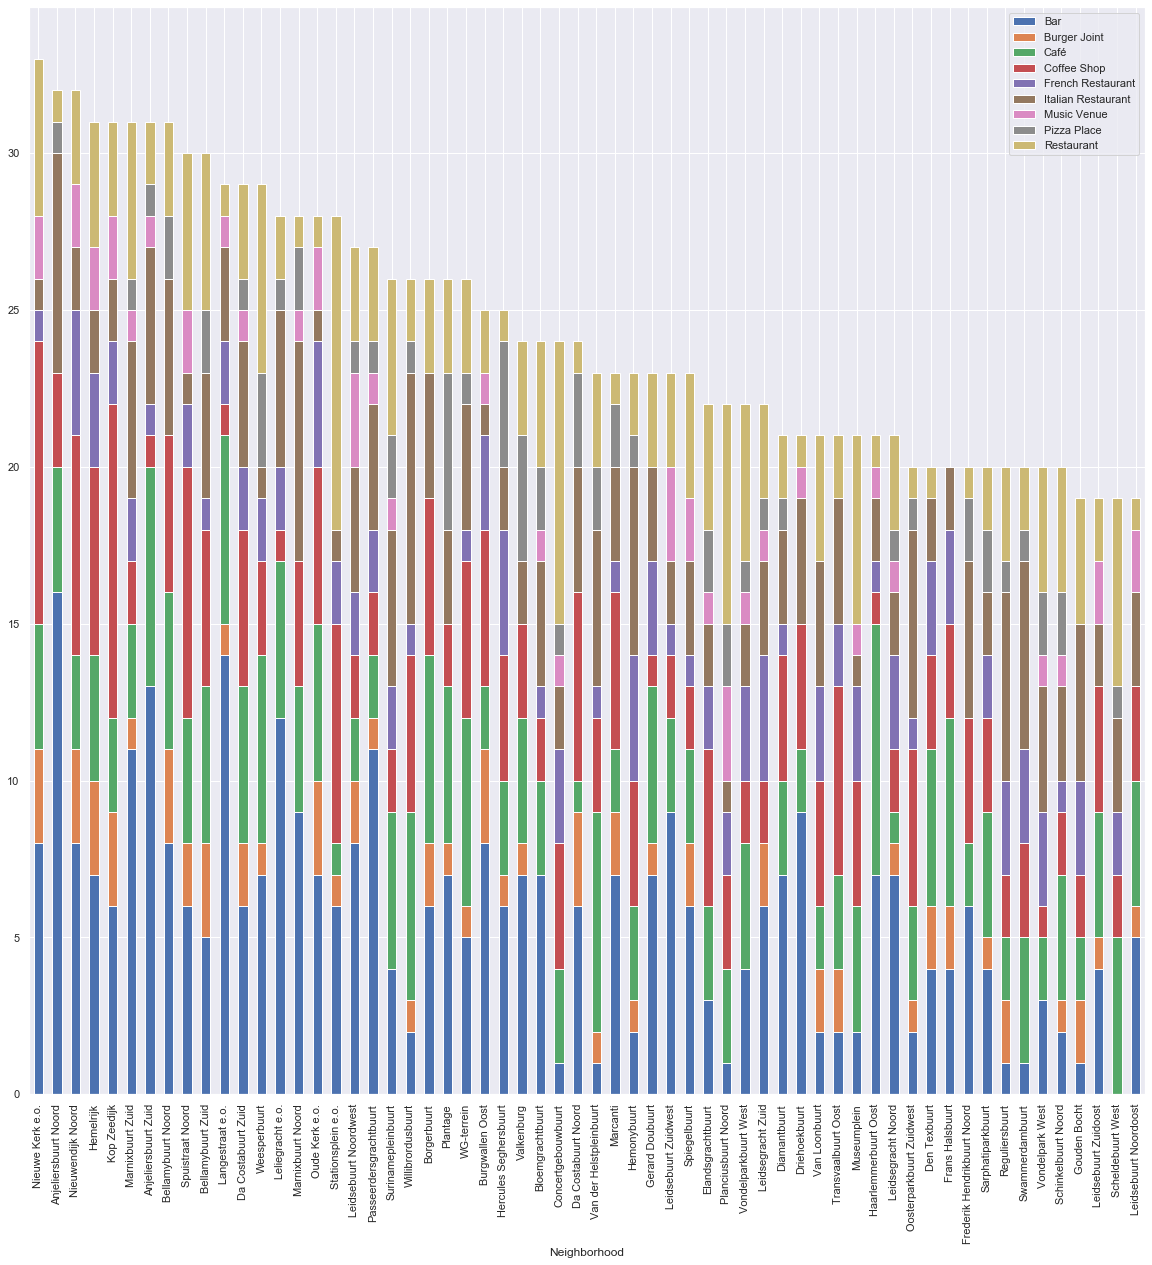

In [31]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

df_bar = ams_hospitality_grouped.sort_values(by='Total', ascending=False).head(60).reset_index()

df_bar2 = df_bar.drop('Total', axis=1)
df_bar3 = df_bar2.transpose()
header=df_bar3.iloc[0]
df_bar3=df_bar3[1:]
df_bar3.columns=header

sns.set(rc={'figure.figsize':(20,20)})
df_bar3.T.plot(kind='bar', stacked=True)

# plt.barh(df_bar['Neighborhood'], df_bar['Total'], alpha=0.5)
# plt.yticks(df_bar['Neighborhood'])
# plt.xlabel('# of venues')
# plt.title('Number of hospitality venues per neighborhood')

# plt.show()

In [53]:
from tqdm import tqdm

def get_venue_details(venue_id):
    venue_details=[]
    for venue in tqdm(venue_id):
        # Fetch data from foursquare API 
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
                venue,
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION)
        
        # Get data
        results = requests.get(url).json()
        venue_data=results['response']['venue']
    
        try:
            venue_id=venue_data['id']
            venue_name=venue_data['name']
            venue_likes=venue_data['likes']['count']
            venue_rating=venue_data['rating']
            venue_tips=venue_data['tips']['count']
            venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
        except KeyError:
            pass
    
    # Create dataframe
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    
    return df

In [54]:
venue_df1 = list(amsterdam_venues_neighborhood.Venue_ID)[0:300]
venue_df2 = list(amsterdam_venues_neighborhood.Venue_ID)[5000:10000]
venue_df3 = list(amsterdam_venues_neighborhood.Venue_ID)[10000:]
venue_test = list(amsterdam_venues_neighborhood.Venue_ID)[0:]

In [56]:
venue_df = get_venue_details(venue_df1)


  0%|          | 0/5000 [00:00<?, ?it/s]


KeyError: 'venue'

In [57]:
# Fetch data from foursquare API 
venue_id = venue_test[2]

url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
        venue_id,
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION)

# Get data
results = requests.get(url).json()
venue_data=results['response']['venue']

KeyError: 'venue'

In [58]:
results

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5ebe48c695feaf001baf10b8'},
 'response': {}}

In [47]:
venue_data

{'id': '4ccc06c7b571b60c37abcf65',
 'name': 'Sportcentrum Caland',
 'contact': {},
 'location': {'address': 'Eliza van Calcarstraat 2',
  'lat': 52.354371026172096,
  'lng': 4.807131832054338,
  'labeledLatLngs': [{'label': 'display',
    'lat': 52.354371026172096,
    'lng': 4.807131832054338}],
  'postalCode': '1068 RR',
  'cc': 'NL',
  'city': 'Amsterdam',
  'state': 'Noord-Holland',
  'country': 'Nederland',
  'formattedAddress': ['Eliza van Calcarstraat 2',
   '1068 RR Amsterdam',
   'Nederland']},
 'canonicalUrl': 'https://foursquare.com/v/sportcentrum-caland/4ccc06c7b571b60c37abcf65',
 'categories': [{'id': '4bf58dd8d48988d175941735',
   'name': 'Gym / Fitness Center',
   'pluralName': 'Gyms or Fitness Centers',
   'shortName': 'Gym / Fitness',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 1},
 'likes': {'count': 12,
  'groups': [{'type': 'others', 'count': 12,